In [1]:
from urllib import request
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()


In [2]:
#  Données  olist_customers_dataset
xolist_customers_dataset = pd.read_csv('olist_customers_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_customers_dataset: ', xolist_customers_dataset.shape)
#xolist_customers_dataset.head(10)

forme des données olist_customers_dataset:  (99441, 5)


In [3]:
#  Données  olist_geolocation_dataset
xolist_geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_geolocation_dataset: ', xolist_geolocation_dataset.shape)
#xolist_geolocation_dataset.head(10)

forme des données olist_geolocation_dataset:  (1000163, 5)


In [4]:
#  Données  olist_order_items_dataset
xolist_order_items_dataset = pd.read_csv('olist_order_items_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_items_dataset: ', xolist_order_items_dataset.shape)
xolist_order_items_dataset.head(10)

forme des données olist_order_items_dataset:  (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [5]:
#  Données  olist_order_payments_dataset
xolist_order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_payments_dataset: ', xolist_order_payments_dataset.shape)
xolist_order_payments_dataset.head(10)

forme des données olist_order_payments_dataset:  (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [6]:
#  Données  olist_order_reviews_dataset
xolist_order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_order_reviews_dataset: ', xolist_order_reviews_dataset.shape)
xolist_order_reviews_dataset.head(10)

forme des données olist_order_reviews_dataset:  (100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [7]:
#  Données  olist_orders_dataset
xolist_orders_dataset = pd.read_csv('olist_orders_dataset.csv', sep = ',', low_memory=False )
print('forme des données olist_orders_dataset: ', xolist_orders_dataset.shape)
xolist_orders_dataset.head(10)

forme des données olist_orders_dataset:  (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [8]:
#  Données d olist_products_dataset
xolist_products_dataset = pd.read_csv('olist_products_dataset.csv', sep = ',', low_memory=False )
#xtrain = convert_types(xtrain, print_info=True)
print('forme des données d olist_products_dataset: ', xolist_products_dataset.shape)
#xolist_products_dataset.head(100)

forme des données d olist_products_dataset:  (32951, 9)


In [9]:
# Fonctionnalités  des données olist_sellers_dataset
xolist_sellers_dataset = pd.read_csv('olist_sellers_dataset.csv', sep = ',', low_memory=False )

print('forme des fonctionnalités  des données olist_sellers_dataset: ', xolist_sellers_dataset.shape)
#xolist_sellers_dataset.head(10)

forme des fonctionnalités  des données olist_sellers_dataset:  (3095, 4)


# *          La présentation générale du jeu de données et nettoyage            *


In [10]:
xolist_order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [11]:
xolist_order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
#recherche de doublons
xolist_order_payments_dataset.duplicated(subset=['order_id']).sum()

4446

In [13]:
#suppression de doublons en gardant le dernier
#xolist_order_payments_dataset=xolist_order_payments_dataset.drop_duplicates(subset=['order_id'], keep='last')
#xolist_order_payments_dataset

Diagramme barre horizontale payment_type

Commentaire.



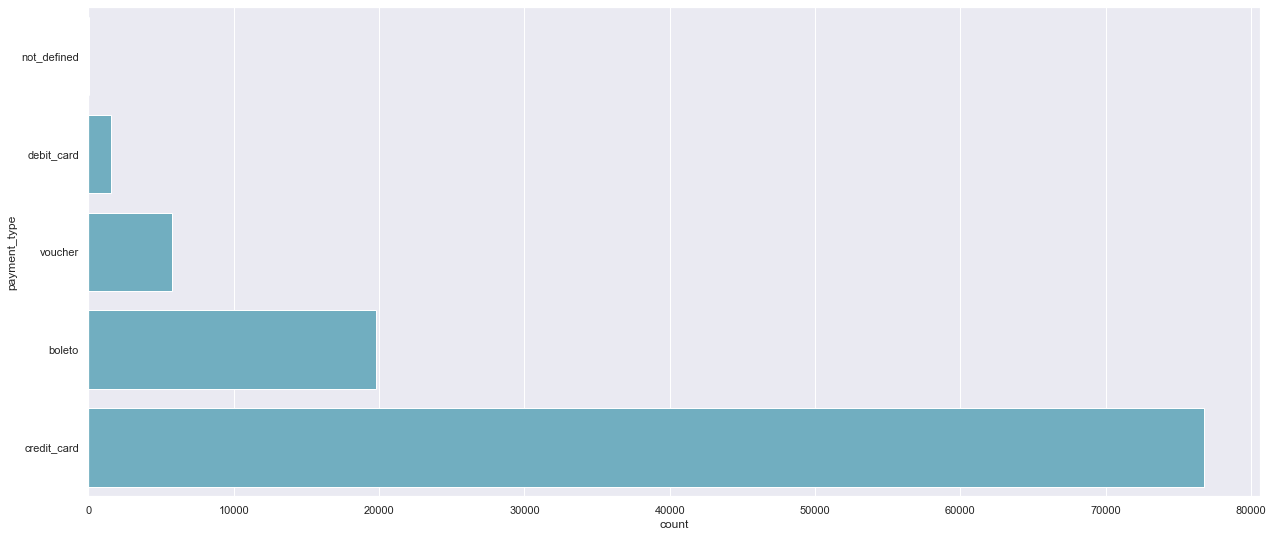

In [14]:
print ('Diagramme barre horizontale payment_type\n')
print('Commentaire.\n')
f, ax = plt.subplots(figsize=(21, 9))
sns.countplot(y="payment_type", data=xolist_order_payments_dataset, order=xolist_order_payments_dataset['payment_type'].value_counts().sort_values().index, color="c");

In [15]:
xolist_order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [16]:
X = "payment_type" # qualitative
Y = "payment_value" # quantitative
#sous echantillon payment_value
sous_echantillon1 = xolist_order_payments_dataset[xolist_order_payments_dataset["payment_value"] < 13664.000000].copy()

# On étudie le payment_type:
sous_echantillon1 = sous_echantillon1[sous_echantillon1["payment_type"] != "none"] 

In [17]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

Nous observons que la catégorie ...


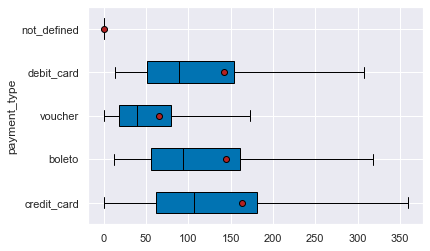

In [18]:
modalites = sous_echantillon1[X].unique()
groupes = []
print('Nous observons que la catégorie ...')

for m in modalites:
    groupes.append(sous_echantillon1[sous_echantillon1[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.ylabel("payment_type")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [19]:
X = "payment_type" # qualitative
Y = "payment_installments" # quantitative
#sous echantillon payment_value
sous_echantillon1 = xolist_order_payments_dataset[xolist_order_payments_dataset["payment_installments"] < 24.000000].copy()

# On étudie le payment_type:
sous_echantillon1 = sous_echantillon1[sous_echantillon1["payment_type"] != "none"] 

In [20]:
# Changement de la palette graphique
sns.set_palette(sns.color_palette("colorblind", 3))

Nous observons que la catégorie ...


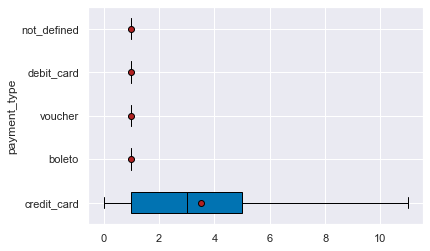

In [21]:
modalites = sous_echantillon1[X].unique()
groupes = []
print('Nous observons que la catégorie ...')

for m in modalites:
    groupes.append(sous_echantillon1[sous_echantillon1[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.ylabel("payment_type")    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [22]:
effectifs = xolist_order_payments_dataset["payment_type"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["payment_type"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_order_payments_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_order_payments_dataset)*100 # len(data) renvoie la taille de l'échantillon
print(tab)

  payment_type      n         f  pourcentage
0  credit_card  76795  0.739224    73.922376
1       boleto  19784  0.190440    19.043952
2      voucher   5775  0.055590     5.558978
3   debit_card   1529  0.014718     1.471806
4  not_defined      3  0.000029     0.002888


In [23]:
effectifs = xolist_order_payments_dataset["payment_installments"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["payment_installments"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_order_payments_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_order_payments_dataset)*100 # len(data) renvoie la taille de l'échantillon
tab

,payment_installments,n,f,pourcentage
0,1,52546,0.505804,50.580444
1,2,12413,0.119487,11.948675
2,3,10461,0.100697,10.069692
3,4,7098,0.068325,6.832489
4,10,5328,0.051287,5.128699
5,5,5239,0.050430,5.043028
6,8,4268,0.041083,4.108350
7,6,3920,0.037734,3.773367
8,7,1626,0.015652,1.565177
9,9,644,0.006199,0.619910


In [24]:
effectifs = xolist_order_payments_dataset["payment_value"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["payment_value"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_order_payments_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_order_payments_dataset)*100 # len(data) renvoie la taille de l'échantillon
print(tab)

       payment_value    n         f  pourcentage
0              50.00  324  0.003119     0.311880
1              20.00  274  0.002638     0.263751
2             100.00  255  0.002455     0.245461
3              77.57  250  0.002406     0.240648
4              35.00  165  0.001588     0.158828
...              ...  ...       ...          ...
29072         355.78    1  0.000010     0.000963
29073         365.60    1  0.000010     0.000963
29074        1243.66    1  0.000010     0.000963
29075         163.42    1  0.000010     0.000963
29076         816.89    1  0.000010     0.000963

[29077 rows x 4 columns]


In [25]:
xolist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [26]:
#recherche de doublons
xolist_order_reviews_dataset.duplicated(subset=['order_id']).sum()

559

In [27]:
#suppression de doublons en gardant le dernier
#xolist_order_reviews_dataset=xolist_order_reviews_dataset.drop_duplicates(subset=['order_id'], keep='last')
#xolist_order_reviews_dataset

In [28]:
#recherche de doublons
xolist_order_reviews_dataset.duplicated(subset=['review_id']).sum()

827

In [29]:
#suppression de doublons en gardant le dernier
#xolist_order_reviews_dataset=xolist_order_reviews_dataset.drop_duplicates(subset=['review_id'], keep='last')
#xolist_order_reviews_dataset

In [30]:
#for index, value in xolist_order_reviews_dataset.dtypes.items(): 
#    if value == 'object':
#        xolist_order_reviews_dataset[index] = xolist_order_reviews_dataset[index].fillna('none')
#    else:
#        xolist_order_reviews_dataset[index] = xolist_order_reviews_dataset[index].fillna(0)

#xolist_order_reviews_dataset

In [31]:
effectifs = xolist_order_reviews_dataset["review_comment_title"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["review_comment_title"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_order_reviews_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_order_reviews_dataset)*100 # len(data) renvoie la taille de l'échantillon
tab

,review_comment_title,n,f,pourcentage
0,Recomendo,426,0.00426,0.426
1,recomendo,346,0.00346,0.346
2,Bom,294,0.00294,0.294
3,super recomendo,271,0.00271,0.271
4,Excelente,248,0.00248,0.248
...,...,...,...,...
4595,Acessórios Sony Xperia XA,1,0.00001,0.001
4596,produto de ma qualidade,1,0.00001,0.001
4597,Não recebi a colcha Fanta,1,0.00001,0.001
4598,Ainda tenho dúvidas,1,0.00001,0.001


In [32]:
xolist_order_reviews_dataset.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [33]:
xolist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
#recherche de doublons
xolist_orders_dataset.duplicated(subset=['order_id']).sum()

0

In [35]:
#recherche de doublons
xolist_orders_dataset.duplicated(subset=['customer_id']).sum()

0

In [36]:
xolist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Diagramme barre horizontale payment_type

Commentaire.



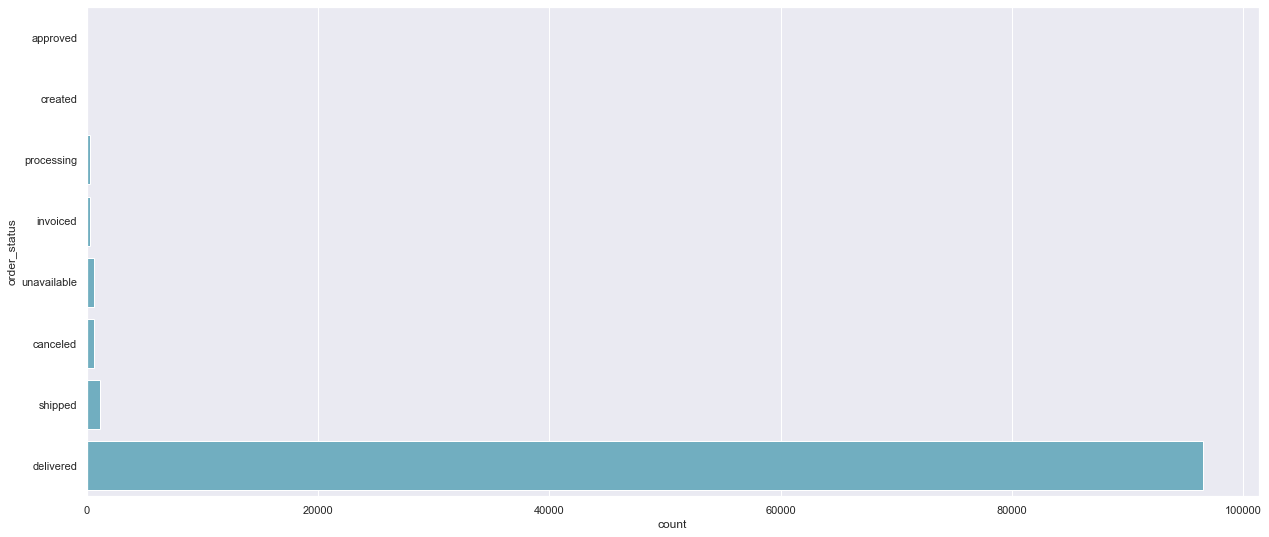

In [37]:
print ('Diagramme barre horizontale payment_type\n')
print('Commentaire.\n')
f, ax = plt.subplots(figsize=(21, 9))
sns.countplot(y="order_status", data=xolist_orders_dataset, order=xolist_orders_dataset['order_status'].value_counts().sort_values().index, color="c");

In [38]:
effectifs = xolist_orders_dataset["order_status"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["order_status"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(xolist_orders_dataset) # len(data) renvoie la taille de l'échantillon
tab["pourcentage"] =tab["n"] / len(xolist_orders_dataset)*100 # len(data) renvoie la taille de l'échantillon
tab

,order_status,n,f,pourcentage
0,delivered,96478,0.970203,97.020344
1,shipped,1107,0.011132,1.113223
2,canceled,625,0.006285,0.628513
3,unavailable,609,0.006124,0.612423
4,invoiced,314,0.003158,0.315765
5,processing,301,0.003027,0.302692
6,created,5,0.000050,0.005028
7,approved,2,0.000020,0.002011


In [39]:
#recherche de doublons
xolist_products_dataset.duplicated(subset=['product_id']).sum()

0

In [40]:
#recherche de doublons
xolist_sellers_dataset.duplicated(subset=['seller_id']).sum()

0

### Jointure en zip_code_prefix de xolist_sellers_dataset et xolist_geolocation_dataset

In [41]:
xolist_sellers_dataset = xolist_sellers_dataset.rename(columns = {'seller_zip_code_prefix': 'zip_code_prefix'})
#xolist_sellers_dataset

In [42]:
xolist_geolocation_dataset = xolist_geolocation_dataset.rename(columns = {'geolocation_zip_code_prefix': 'zip_code_prefix'})
#xolist_geolocation_dataset

In [43]:
dataset_Sellers_merge1 = pd.merge(xolist_sellers_dataset, xolist_geolocation_dataset, how='inner', on=['zip_code_prefix'])
#dataset_Sellers_merge1

### Jointure en seller_id  de dataset_Sellers_merge1 et xolist_order_items_dataset

In [44]:
XSellers = pd.merge(dataset_Sellers_merge1, xolist_order_items_dataset, how='inner', on=['seller_id'])
#XSellers

### Jointure en customer_id de xolist_orders_dataset et xolist_customers_dataset

In [45]:
dataset_Orders_merge1 = pd.merge(xolist_orders_dataset, xolist_customers_dataset, how='inner', on=['customer_id'])
#dataset_Orders_merge1

### Jointure en order_id de dataset_Orders_merge1 et xolist_order_payments_dataset

In [46]:
dataset_Orders_merge2 = pd.merge(dataset_Orders_merge1, xolist_order_payments_dataset, how='inner', on=['order_id'])
#dataset_Orders_merge2

### Jointure en order_id de dataset_Orders_merge2 et xolist_order_reviews_dataset

In [47]:
dataset_Orders_merge3 = pd.merge(dataset_Orders_merge2, xolist_order_reviews_dataset, how='inner', on=['order_id'])
#dataset_Orders_merge3

### Jointure en order_id de dataset_Orders_merge3 et xolist_order_items_dataset

In [48]:
XOrders = pd.merge(dataset_Orders_merge3, xolist_order_items_dataset, how='inner', on=['order_id'])
XOrders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
118311,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
118312,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
118313,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,NaN,Foi entregue somente 1. Quero saber do outro p...,2

In [49]:
XOrders.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,order_item_id,price,freight_value
count,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000
mean,35051.681579,1.094062,2.943498,172.575651,4.014554,1.196509,120.651027,20.033024
std,29824.811223,0.728555,2.778022,267.104661,1.400186,0.699452,184.109626,15.836523
min,1003.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.850000,0.000000
25%,11310.000000,1.000000,1.000000,60.850000,3.000000,1.000000,39.900000,13.080000
50%,24310.000000,1.000000,2.000000,108.200000,5.000000,1.000000,74.900000,16.280000
75%,58640.000000,1.000000,4.000000,189.260000,5.000000,1.000000,134.900000,21.180000
max,99990.000000,29.000000,24.000000,13664.080000,5.000000,21.000000,6735.000000,409.680000


In [50]:
#recherche de doublons
XOrders.duplicated(subset=['order_id']).sum()

19650

In [51]:
#recherche de doublons
XOrders.duplicated(subset=['customer_id']).sum()

19650

In [52]:
#recherche de doublons
XOrders.duplicated(subset=['customer_unique_id']).sum()

22896

In [53]:
#recherche de doublons
XOrders.duplicated(subset=['order_id','customer_id','customer_unique_id']).sum()

19650

In [54]:
#Permet d'obtenir la somme des NaN .
XOrders.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             104226
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
order_item_id                         0
product_id                            0
seller_id                             0


In [55]:
#Calcul du pourcentage par colonnes des NaN
PourcentXOrdersNaN=((XOrders.isna().sum()*100)/len(XOrders))
PourcentXOrdersNaN

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.012678
order_delivered_carrier_date      1.059883
order_delivered_customer_date     2.187381
order_estimated_delivery_date     0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
payment_sequential                0.000000
payment_type                      0.000000
payment_installments              0.000000
payment_value                     0.000000
review_id                         0.000000
review_score                      0.000000
review_comment_title             88.091958
review_comment_message           57.177873
review_creation_date              0.000000
review_answer_timestamp           0.000000
order_item_id                     0.000000
product_id 

In [56]:
for index, value in XOrders.dtypes.items(): 
    if value == 'object':
        XOrders[index] = XOrders[index].fillna('none')
    else:
        XOrders[index] = XOrders[index].fillna(0)

XOrders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,none,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,none,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,none,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,none,none,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,none,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
118311,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,none,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
118312,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,none,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
118313,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,none,Foi entregue somente 1. Quero saber do out

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import datetime as dt
NOW = dt.datetime(2020,12,18)

In [59]:
# Make the date_placed column datetime
XOrders['order_purchase_timestamp'] = pd.to_datetime(XOrders['order_purchase_timestamp'])

### RFM Récence Fréquence Montant

In [60]:
rfmTable = XOrders.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'price': lambda x: x.sum()}) # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'recency', 
                         'order_id': 'frequency', 
                         'price': 'monetary_value'}, inplace=True)

In [61]:
rfmTable.head(100)

,recency,frequency,monetary_value
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,1129,1,89.80
000161a058600d5901f007fab4c27140,1250,1,54.90
0001fd6190edaaf884bcaf3d49edf079,1388,1,179.99
0002414f95344307404f0ace7a26f1d5,1219,1,149.90
000379cdec625522490c315e70c7a9fb,990,1,93.00
...,...,...,...
003f7d92ac63c512bb6584219806f8df,1037,1,72.90
0040a8417928d0d5abd5169cd7877181,904,1,199.99
0040b00970e2139e8c43b647c0da5305,1421,1,30.97


In [62]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [63]:
quantiles = quantiles.to_dict()

In [64]:
quantiles

{'recency': {0.25: 958.0, 0.5: 1063.0, 0.75: 1192.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 47.7, 0.5: 89.69999999999999, 0.75: 155.0}}

In [65]:
rfmSegmentation = rfmTable

In [66]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [67]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [68]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [69]:
rfmSegmentation.head(40)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1129,1,89.80,3,4,2,342
000161a058600d5901f007fab4c27140,1250,1,54.90,4,4,3,443
0001fd6190edaaf884bcaf3d49edf079,1388,1,179.99,4,4,1,441
0002414f95344307404f0ace7a26f1d5,1219,1,149.90,4,4,2,442
000379cdec625522490c315e70c7a9fb,990,1,93.00,2,4,2,242
0004164d20a9e969af783496f3408652,1345,1,59.99,4,4,3,443
000419c5494106c306a97b5635748086,1021,1,34.30,2,4,4,244
00046a560d407e99b969756e0b10f282,1095,1,120.90,3,4,2,342
00050bf6e01e69d5c0fd612f1bcfb69c,1187,1,69.99,3,4,3,343


In [70]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(30)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer_id,,,,,,,
6f241d5bbb142b6f764387c8c270645a,952,7,9520.14,1,1,1,111
eb7a157e8da9c488cd4ddc48711f1097,926,2,7798.00,1,1,1,111
ec5b2ba62e574342386871631fafd3fc,886,4,7160.00,1,1,1,111
d1ea705f2fdd8f98eff86c2691652e60,905,14,6019.86,1,1,1,111
e0a2412720e9ea4f26c1ac985f6a7358,889,2,4599.90,1,1,1,111
9cf0a858f5f153406bc333860eb23e22,854,2,4598.00,1,1,1,111
cc803a2c412833101651d3f90ca7de24,931,2,4400.00,1,1,1,111
466dcf5fcdc7c7a8a4bfebc7ce59b281,853,2,3976.00,1,1,1,111
38fc30b75b381342c67d25e2f11ccec0,928,2,3780.00,1,1,1,111


In [71]:
XOrders.to_csv('XOrders.csv', index = False)

In [72]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in XOrders.columns:
    if XOrders[col].dtype == 'object':
        XOrders[col] = labelencoder.fit_transform(XOrders[col])

XOrders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,88252,61306,2,2017-10-02 10:56:33,26630,24732,25873,205,46407,3149,...,4000,17259,311,26516,1,17417,630,26724,29.99,8.72
1,88252,61306,2,2017-10-02 10:56:33,26630,24732,25873,205,46407,3149,...,4000,17259,311,26516,1,17417,630,26724,29.99,8.72
2,88252,61306,2,2017-10-02 10:56:33,26630,24732,25873,205,46407,3149,...,4000,17259,311,26516,1,17417,630,26724,29.99,8.72
3,32271,68221,2,2018-07-24 20:41:37,83205,76465,88740,404,65363,47813,...,1739,14957,609,90872,1,11598,477,85130,118.70,22.76
4,27537,25340,2,2018-08-08 08:38:49,86329,78215,91781,420,21866,75265,...,4000,33042,619,94804,1,21798,857,89023,159.90,19.22


In [73]:
X10 = XOrders.values

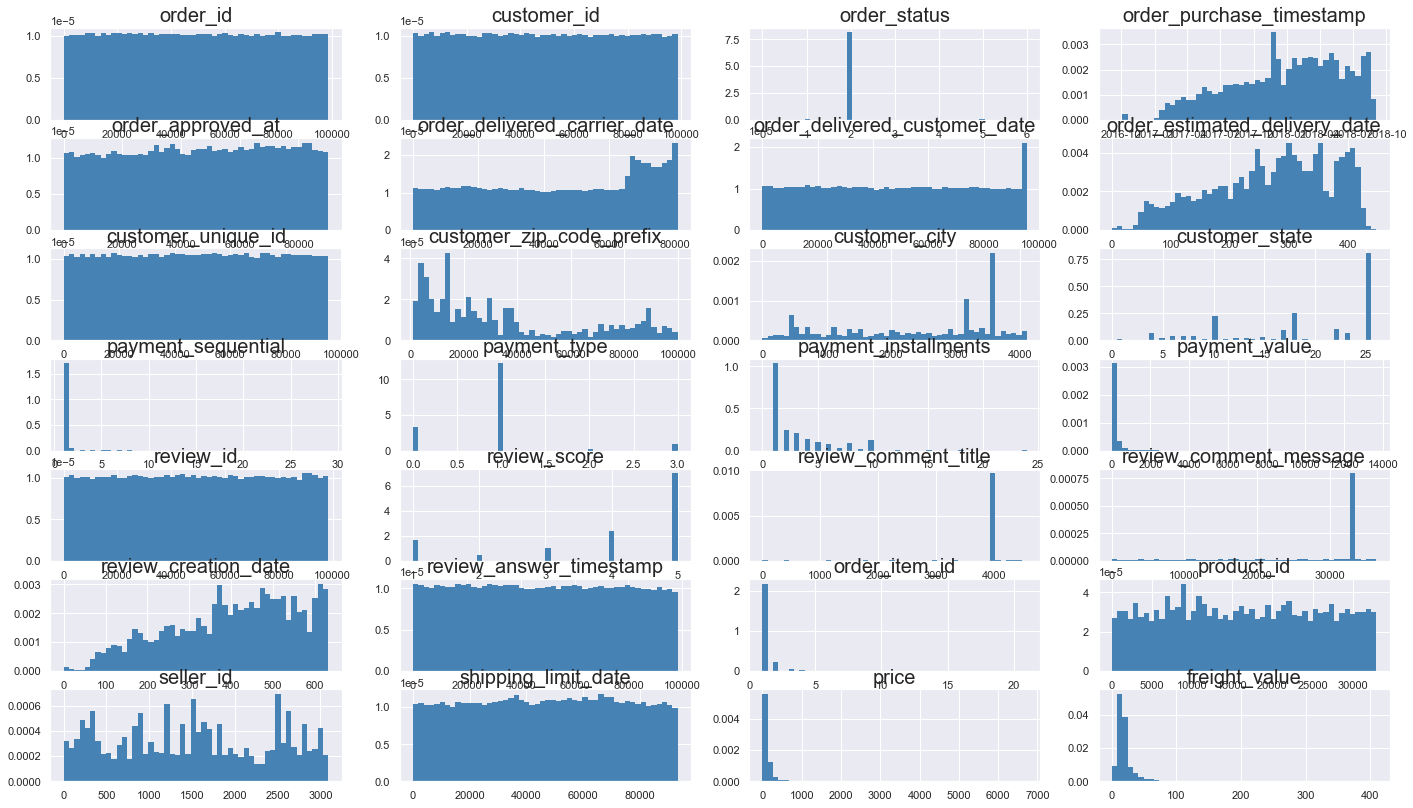

In [74]:
fig = plt.figure(figsize=(24, 24))
for feat_idx in range(X10.shape[1]):
    ax = fig.add_subplot(12,4, (feat_idx+1))
    ax.set_title(XOrders.columns[feat_idx], fontdict={'fontsize': 20, 'fontweight': 'medium'})
    
    h = ax.hist(X10[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')